In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
data = pd.read_csv('Real estate.csv')
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
data.shape

(414, 8)

In [4]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [5]:
data.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [6]:
data.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [67]:
data.rename(columns = {
    'X1 transaction date' : 'Date',
    'X2 house age' : 'House_age',
    'X3 distance to the nearest MRT station' : 'MRT_distance',
    'X4 number of convenience stores' : 'Conv_store_count',
    'X5 latitude' : 'Latitude',
    'X6 longitude' : 'Longitude',
    'Y house price of unit area' : 'Price_per_unit'
}, inplace = True)

In [68]:
data.head()

,No,Date,House_age,MRT_distance,Conv_store_count,Latitude,Longitude,Price_per_unit,Year
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012


In [69]:
# Cleaning Data

data['Year'] = data['Date'].astype(str).apply(lambda x: x[:4])
data['Year'].astype(int)

0      2012
1      2012
2      2013
3      2013
4      2012
5      2012
6      2012
7      2013
8      2013
9      2013
10     2013
11     2013
12     2012
13     2012
14     2013
15     2013
16     2013
17     2012
18     2013
19     2012
20     2013
21     2013
22     2012
23     2013
24     2013
25     2013
26     2012
27     2013
28     2013
29     2013
       ... 
384    2012
385    2013
386    2012
387    2013
388    2013
389    2013
390    2013
391    2013
392    2013
393    2013
394    2013
395    2012
396    2012
397    2013
398    2013
399    2012
400    2013
401    2013
402    2012
403    2012
404    2013
405    2012
406    2013
407    2013
408    2013
409    2013
410    2012
411    2013
412    2013
413    2013
Name: Year, Length: 414, dtype: int32

In [71]:
data.describe()

,No,Date,House_age,MRT_distance,Conv_store_count,Latitude,Longitude,Price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


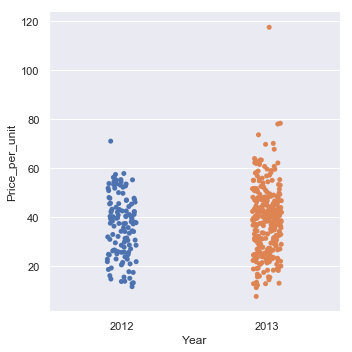

In [73]:
sns.catplot(x = 'Year', y = 'Price_per_unit', data = data)

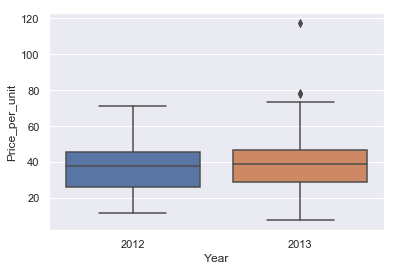

In [74]:
sns.boxplot(x = 'Year', y = 'Price_per_unit', data = data) 

# Visualization

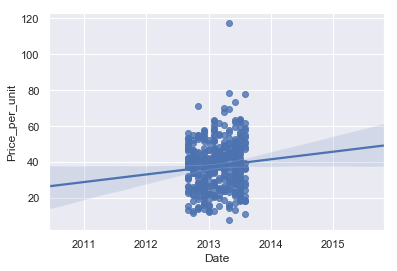

In [76]:
sns.regplot(x = 'Date', y = 'Price_per_unit',
           data = data)

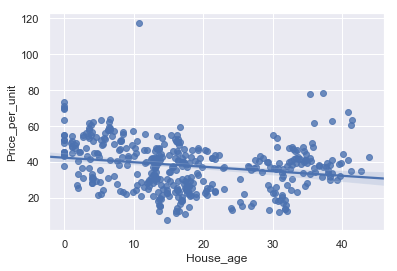

In [77]:
sns.regplot(x='House_age', y = 'Price_per_unit', 
           data = data)

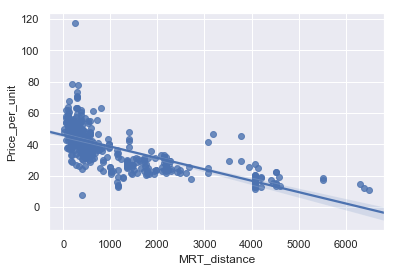

In [78]:
sns.regplot(x = 'MRT_distance', y = 'Price_per_unit',
           data = data)

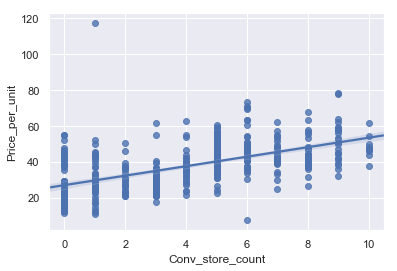

In [79]:
sns.regplot(x = 'Conv_store_count',
            y = 'Price_per_unit', data = data)

In [13]:
data['Year'] = data['X1 transaction date'].astype(str).apply(lambda x: x[:4])

In [14]:
data['X3 distance to the nearest MRT station'].describe()


count     414.000000
mean     1083.885689
std      1262.109595
min        23.382840
25%       289.324800
50%       492.231300
75%      1454.279000
max      6488.021000
Name: X3 distance to the nearest MRT station, dtype: float64

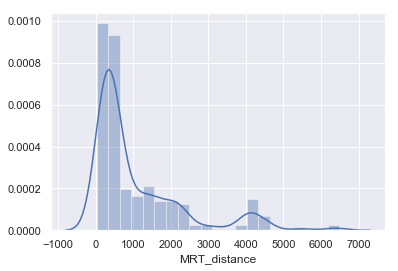

In [80]:
sns.distplot(data['MRT_distance'])

In [81]:
Q1 = data['MRT_distance'].quantile(0.99)
data1 = data[data['MRT_distance']<Q1]
Q1

5394.220430000005

In [82]:
data1['MRT_distance'].describe()

count     409.000000
mean     1023.261961
std      1142.384915
min        23.382840
25%       289.324800
50%       492.231300
75%      1414.837000
max      4605.749000
Name: MRT_distance, dtype: float64

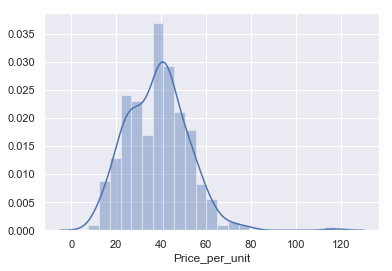

In [83]:
sns.distplot(data1['Price_per_unit'])

In [84]:
data.columns

Index(['No', 'Date', 'House_age', 'MRT_distance', 'Conv_store_count',
       'Latitude', 'Longitude', 'Price_per_unit', 'Year'],
      dtype='object')

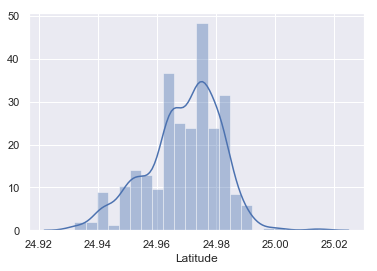

In [85]:
sns.distplot(data['Latitude'])

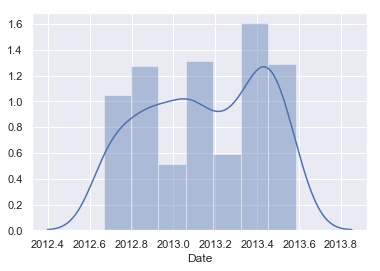

In [86]:
sns.distplot(data['Date'])

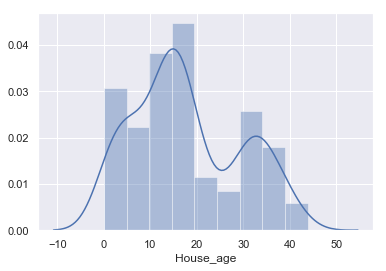

In [87]:
sns.distplot(data['House_age'])

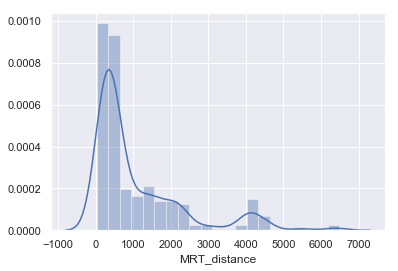

In [88]:
sns.distplot(data['MRT_distance'])

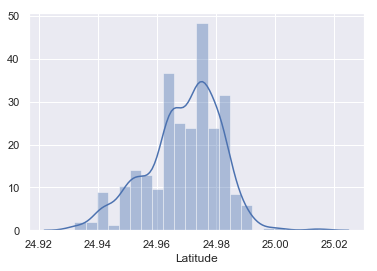

In [89]:
sns.distplot(data['Latitude'])

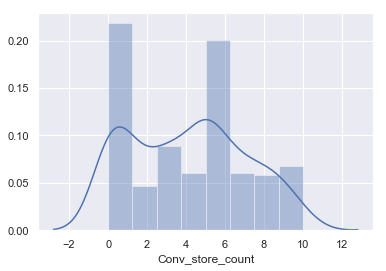

In [90]:
sns.distplot(data['Conv_store_count'])

# Multiple Linear Regression

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [92]:
X = data1.drop(['No', 'Date', 'Price_per_unit',
               'Latitude', 'MRT_distance',
               'Longitude',], axis = 1)
Y = data1['Price_per_unit']

In [93]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                   random_state = 42)

In [94]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.22029111145609415

In [95]:
Y_predict = lr.predict(X)

In [96]:
data2 = {'Actual Prices' : data1['Price_per_unit'],
        'Predicted Prices ' : Y_predict}
pred_check = pd.DataFrame(data2)

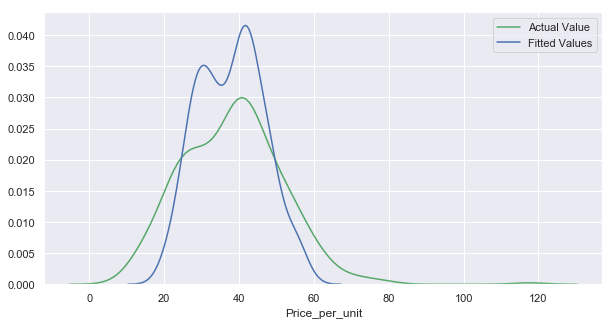

In [97]:
f, ax = plt.subplots(figsize = (10, 5))

ax = sns.distplot(data1['Price_per_unit'], hist = False,
                  color = 'g', label = 'Actual Value')
sns.distplot(Y_predict, hist = False, color = 'b', label = 'Fitted Values',
            ax = ax)

In [98]:
np.sqrt(mean_squared_error(data1['Price_per_unit'],
                          Y_predict))

10.571614102609363

In [99]:
# OLS

import statsmodels.api as sm 
from pandas.core import datetools
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [100]:
model1 = sm.OLS(y_train, x_train.astype(float))
result = model1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Price_per_unit   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     1792.
Date:                Wed, 20 May 2020   Prob (F-statistic):          2.53e-201
Time:                        14:34:23   Log-Likelihood:                -1204.3
No. Observations:                 327   AIC:                             2415.
Df Residuals:                     324   BIC:                             2426.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
House_age           -0.3011      0.048     -6.324      0.000      -0.395      -0.207
Conv_store_count     2.7625      0.185     14.913      0.000       2.398       3.127
Year                 0.0158      0.001     26.231      0.000       0.015       0.017
==============================================================================
Omnibus:                       23.383   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.090
Skew:                           0.572   Prob(JB):                     4.82e-07
Kurtosis:                       3.908   Cond. No.                         698.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
# Polynomial Features

x1 = data.drop(['Date', 'Year', 'Price_per_unit'], axis = 1)
y1 = data['Price_per_unit']

pf = PolynomialFeatures(degree=2)
x_poly = pf.fit_transform(x1)
x_poly_train, x_poly_test, y_poly_train, y_poly_test = train_test_split(x_poly,
                                                                       y1, test_size = 0.5,
                                                                       random_state = 42)
LM_poly = LinearRegression()
LM_poly.fit(x_poly_train, y_poly_train)
LM_poly.score(x_poly_test, y_poly_test)

0.6034438739363829

In [107]:
polynomial_degree = range(2, 10)
score = []

for i in polynomial_degree:
    x2 = data.drop(['Date', 'Year', 'Price_per_unit'], axis = 1)
    y2 = data['Price_per_unit']
    pf1 = PolynomialFeatures(degree = i)
    x2_poly = pf1.fit_transform(x2)
    x2_poly_train, x2_poly_test, y2_poly_train, y2_poly_test = train_test_split(x2_poly, y2, test_size = 0.5, random_state = 42)
    LM1_poly = LinearRegression()
    LM1_poly.fit(x2_poly_train, y2_poly_train)
    print(LM1_poly.score(x2_poly_test, y2_poly_test))

0.6034438739363829
0.188049729504567
-276.16506673993183
-887529.7205920628
-1164836003.38872
-4729816656.286227
-21565242404.19967
-185027834330.9319
